In [121]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv("/home/josue/Progra/data/raw/Meteorite_Landings_20240206.csv")

path_to_data = ("/home/josue/Progra/data/raw/Meteorite_Landings_20240206.csv")


# Mostramos la base de datos
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [123]:
# Convertir las columnas de coordenadas en un objeto Point
geometry = [Point(xy) for xy in zip(df.reclong, df.reclat)]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Guardar como GeoJSON
gdf.to_file("archivo.geojson", driver='GeoJSON')
gdf

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,geometry
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",POINT (6.08333 50.77500)
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",POINT (10.23333 56.18333)
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",POINT (-113.00000 54.21667)
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",POINT (-99.90000 16.88333)
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",POINT (-64.95000 -33.16667)
...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)",POINT (17.01850 29.03700)
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",POINT (8.96667 13.78333)
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)",POINT (17.66667 49.25000)
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",POINT (41.50460 49.78917)


In [124]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

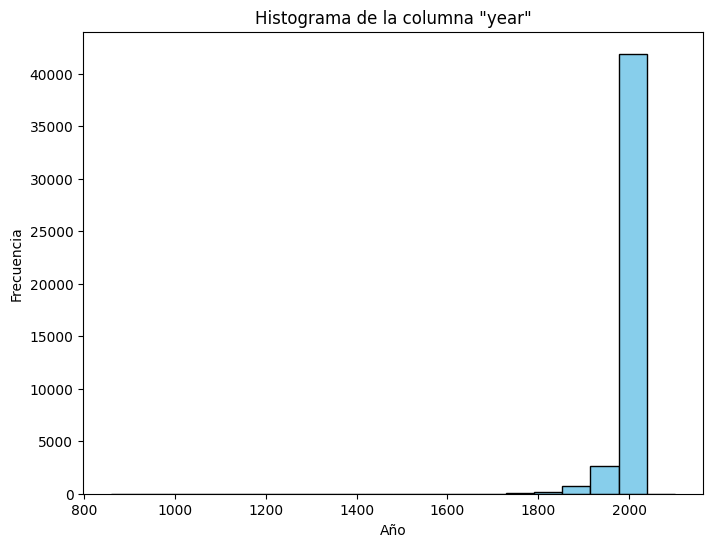

In [125]:
# Histograma para visualizar la distribución de la columna 'year'
plt.figure(figsize=(8, 6))
plt.hist(df['year'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna "year"')
plt.show()


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'mass (g)'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'reclat'}>],
       [<Axes: title={'center': 'reclong'}>, <Axes: >]], dtype=object)

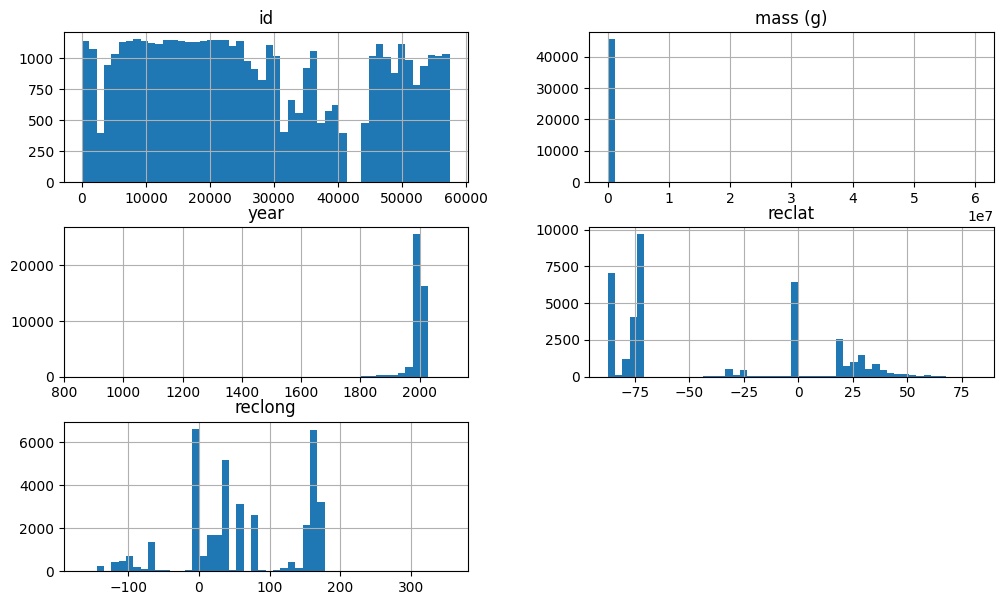

In [126]:
df.hist(bins=50, figsize=(12,7))

<Axes: >

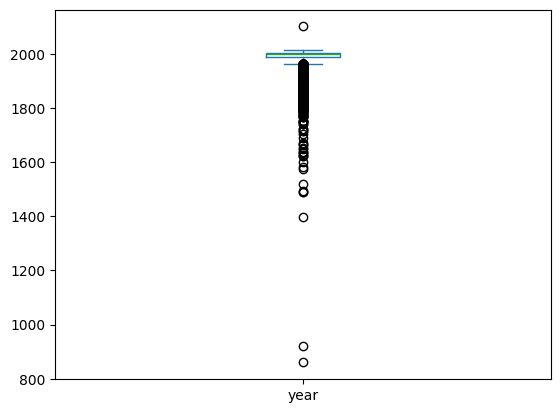

In [127]:
df['year'].plot(kind='box')

<Axes: >

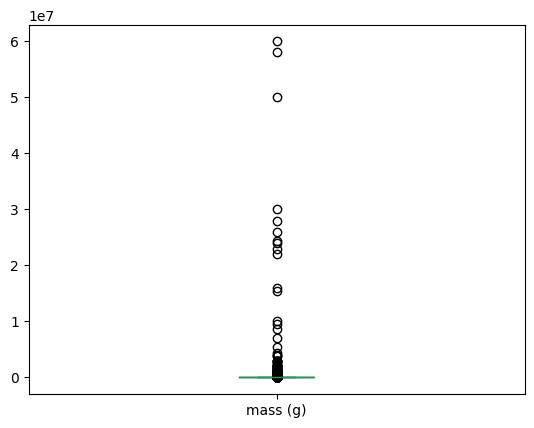

In [128]:
df['mass (g)'].plot(kind='box')

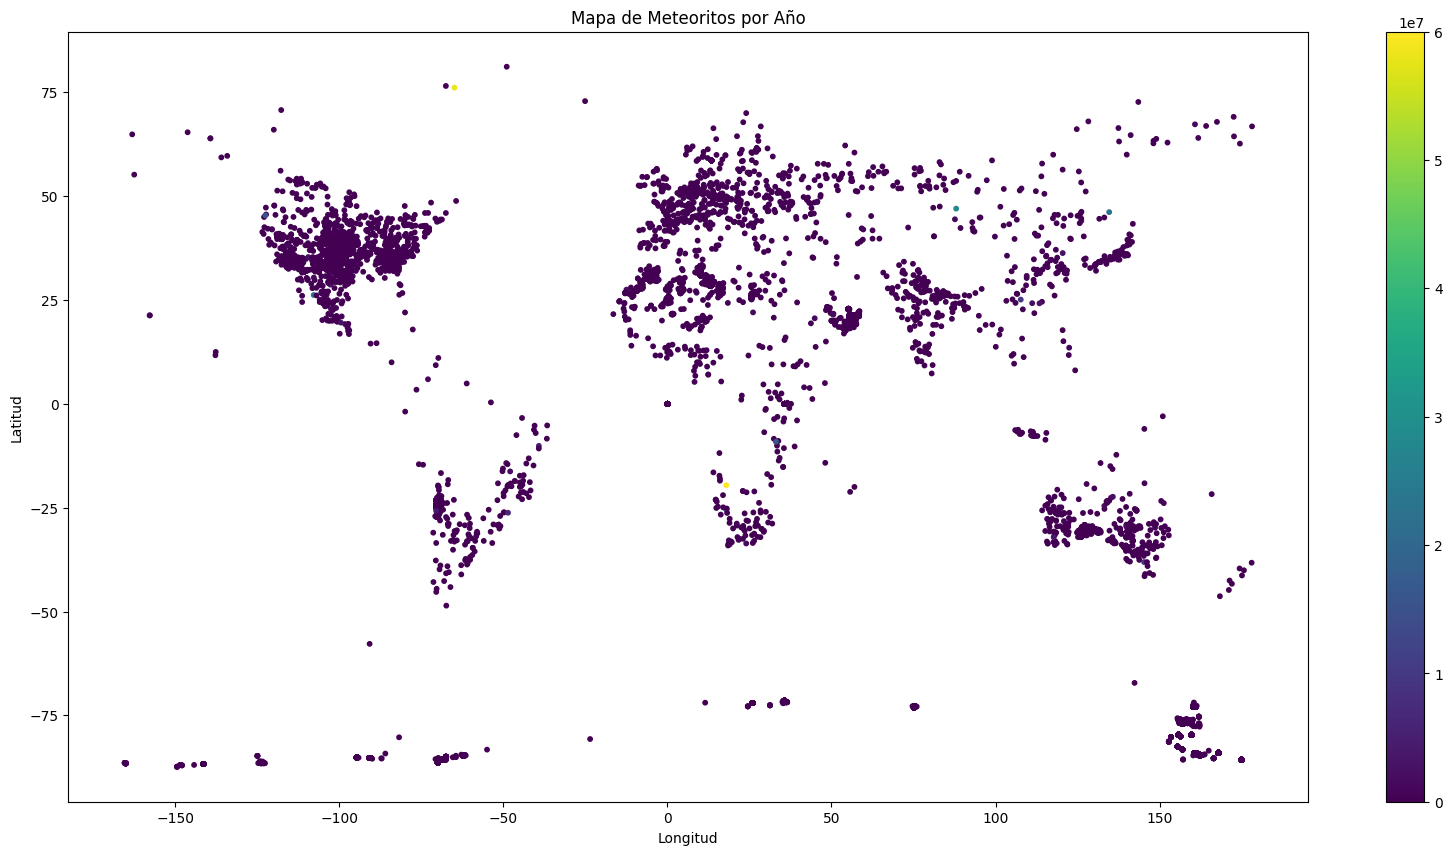

In [129]:
ax = gdf.plot(column='mass (g)', cmap='viridis', markersize=10, legend=True)

fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_aspect('auto')

# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por Año')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()
 


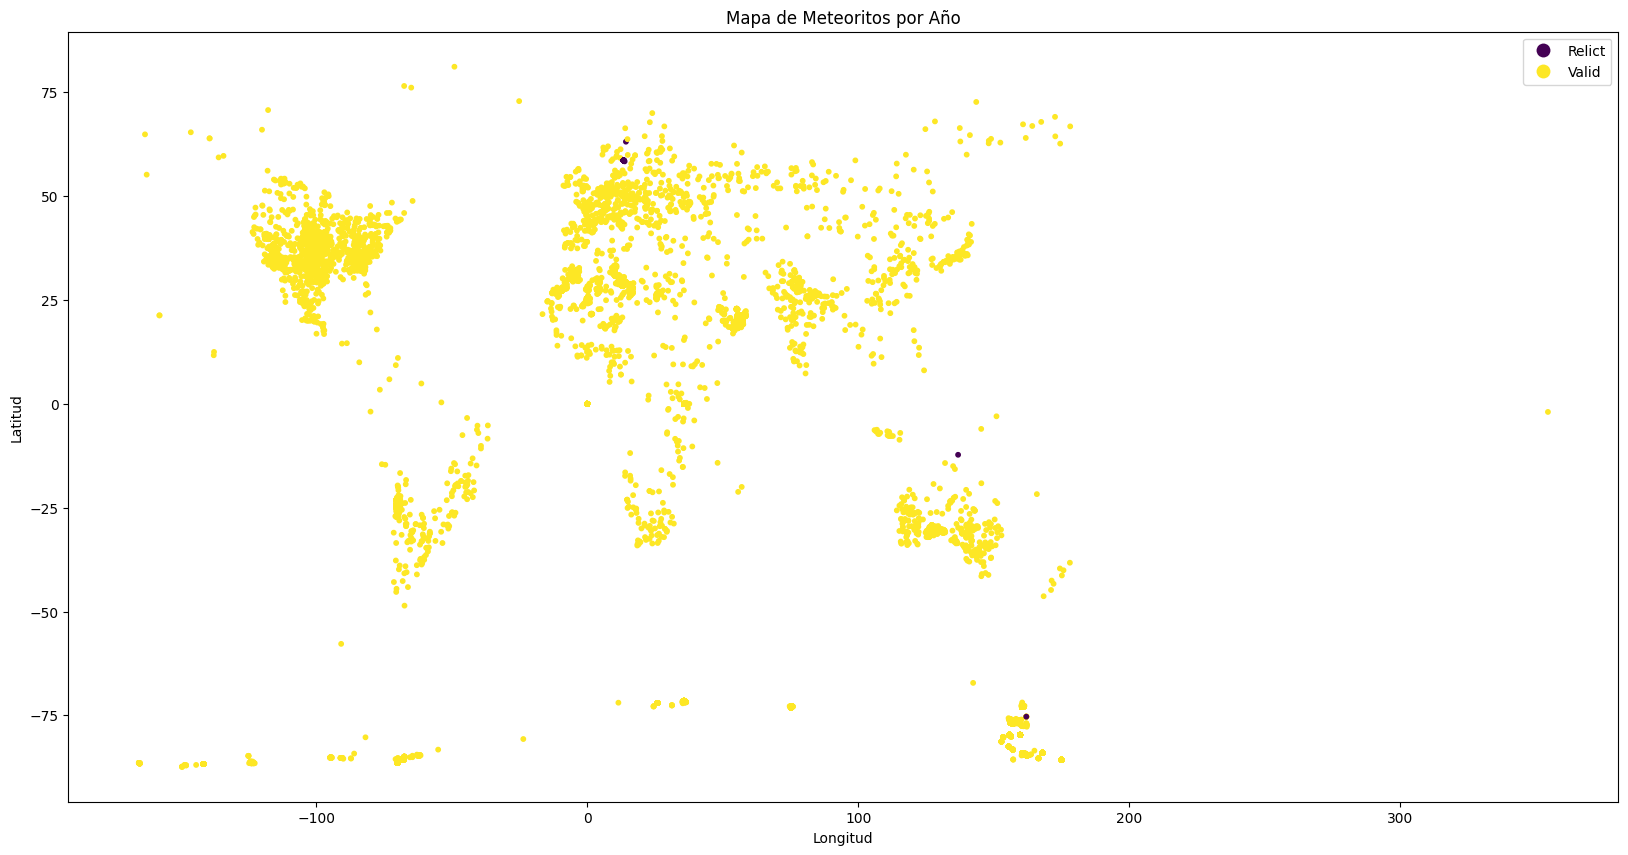

In [130]:
ax = gdf.plot(column='nametype', cmap='viridis', markersize=10, legend=True)

fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_aspect('auto')

# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por Año')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

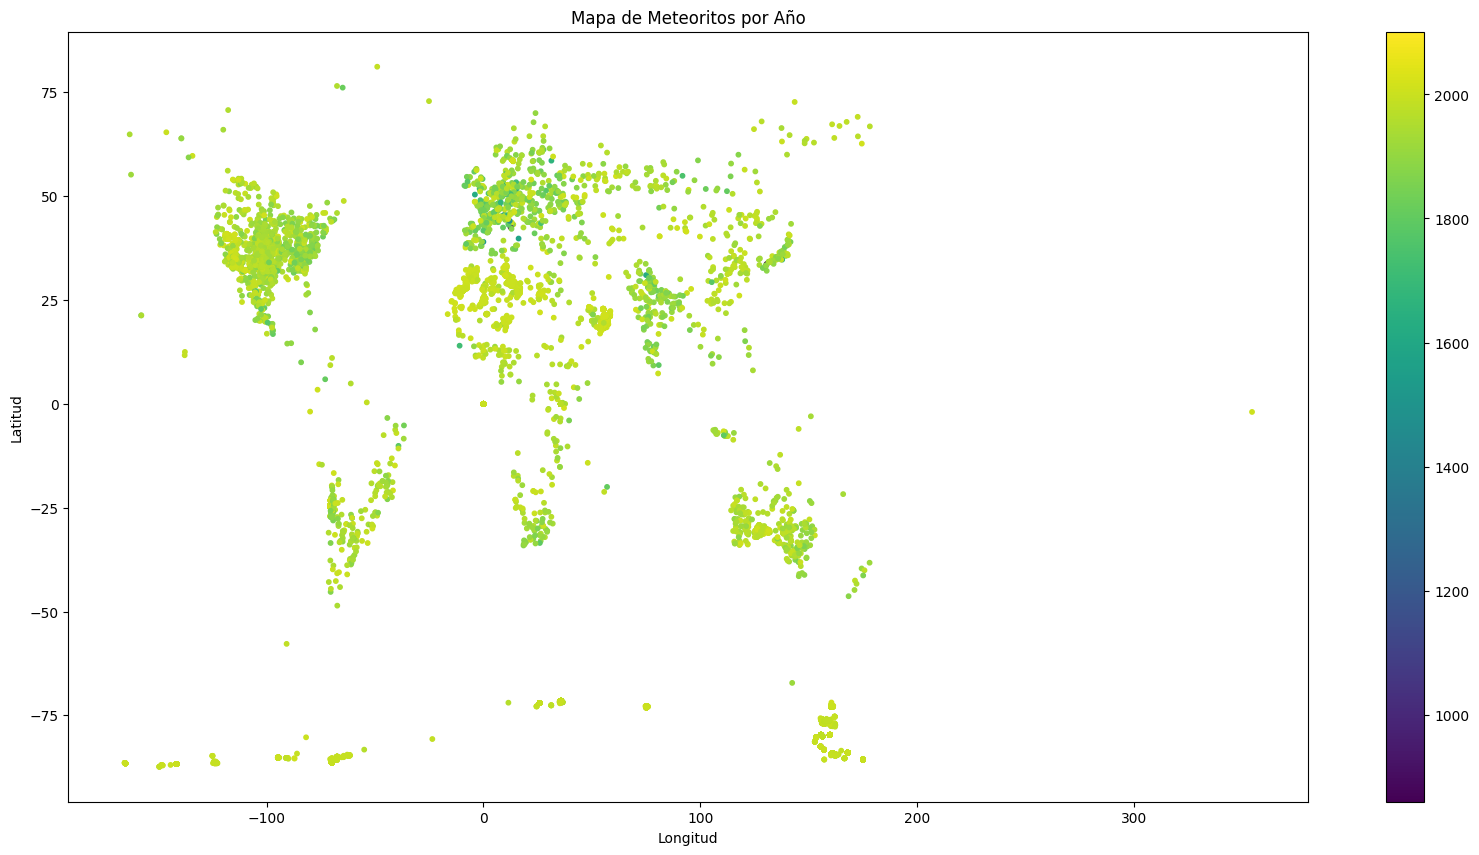

In [131]:


ax = gdf.plot(column='year', cmap='viridis', markersize=10, legend=True)

fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_aspect('auto')

# Añadir título y etiquetas
plt.title('Mapa de Meteoritos por Año')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

In [132]:
df.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


In [133]:
df['year'].max()

2101.0

In [134]:
IQR=df['mass (g)'].quantile(0.75)-df['mass (g)'].quantile(0.25)
IQR

195.4

In [135]:
lower =df['mass (g)'].quantile(0.25) - 1.5*IQR
upper =df['mass (g)'].quantile(0.75) + 1.5*IQR

print(lower, upper)

-285.90000000000003 495.70000000000005


In [136]:
df[(df['mass (g)']<lower) | (df['mass (g)']>upper)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
...,...,...,...,...,...,...,...,...,...,...
45707,Zhaoping,54609,Valid,"Iron, IAB complex",2000000.0,Found,1983.0,24.23333,111.18333,"(24.23333, 111.18333)"
45708,Zhigansk,30405,Valid,"Iron, IIIAB",900000.0,Found,1966.0,68.00000,128.30000,"(68.0, 128.3)"
45709,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981.0,31.20000,112.50000,"(31.2, 112.5)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"


In [137]:
IQR2=df['year'].quantile(0.75)-df['year'].quantile(0.25)
IQR2

16.0

In [138]:
lower =df['year'].quantile(0.25) - 1.5*IQR
upper =df['year'].quantile(0.75) + 1.5*IQR

print(lower, upper)

1693.9 2296.1


In [139]:
df[(df['year']<lower) | (df['year']>upper)]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,1583.0,39.80000,16.20000,"(39.8, 16.2)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)"
312,Fünen,10838,Valid,Stone-uncl,NaN,Fell,1654.0,55.33333,10.33333,"(55.33333, 10.33333)"
369,Hatford,11855,Valid,Stone-uncl,29000.0,Fell,1628.0,51.65000,-1.51667,"(51.65, -1.51667)"
410,Jalandhar,12069,Valid,Iron,1967.0,Fell,1621.0,31.00000,75.00000,"(31.0, 75.0)"
627,Minamino,16692,Valid,L,1040.0,Fell,1632.0,35.07833,136.93333,"(35.07833, 136.93333)"
657,Mount Vaisi,16805,Valid,Stone-uncl,17000.0,Fell,1637.0,44.08333,6.86667,"(44.08333, 6.86667)"
679,Narni,16914,Valid,Stone-uncl,NaN,Fell,920.0,42.51667,12.51667,"(42.51667, 12.51667)"
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)"


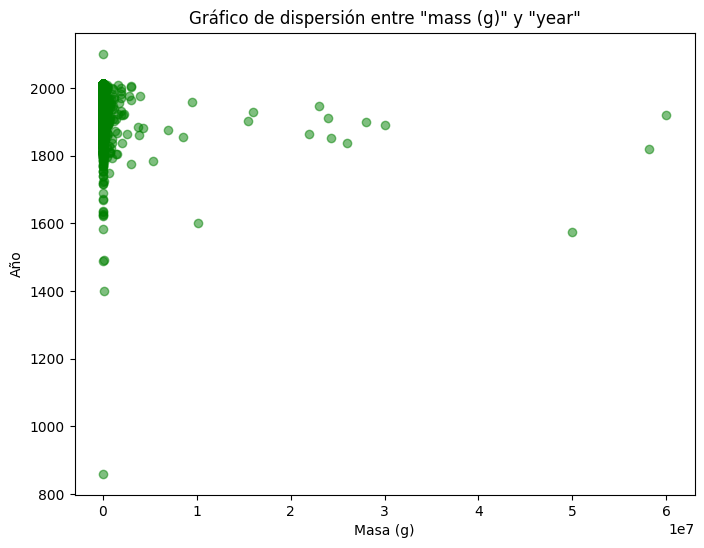

In [140]:
# Gráfico de dispersión para visualizar la relación entre 'mass (g)' y 'year'
plt.figure(figsize=(8, 6))
plt.scatter(df['mass (g)'], df['year'], alpha=0.5, color='green')
plt.xlabel('Masa (g)')
plt.ylabel('Año')
plt.title('Gráfico de dispersión entre "mass (g)" y "year"')
plt.show()


In [141]:
df['recclass'].unique

<bound method Series.unique of 0                          L5
1                          H6
2                         EH4
3                 Acapulcoite
4                          L6
                 ...         
45711                 Eucrite
45712    Pallasite, ungrouped
45713                      H4
45714                      L6
45715                    L3.7
Name: recclass, Length: 45716, dtype: object>

# aqui 


In [142]:
df = df[df['year'] != 2101]

In [143]:

# Identificar filas con valores faltantes en la columna específica
filas_con_valores_faltantes = gdf[gdf['GeoLocation'].isnull()]

# Crear un nuevo conjunto de datos con esas filas
dataset_valores_faltantes = filas_con_valores_faltantes.copy()

# Eliminar las filas con valores faltantes del dataset original
gdf = gdf.dropna(subset=['GeoLocation'])

# Guardar el nuevo dataset en otro archivo CSV si es necesario
dataset_valores_faltantes.to_csv('valores_faltantes.csv', index=False)  # Cambia 'valores_faltantes.csv' por el nombre que desees

# Ahora 'df' contiene el dataset original sin las filas con valores faltantes en la columna específica
# Y 'dataset_valores_faltantes' contiene las filas con valores faltantes en la columna específica

In [144]:
mean_mass = df['mass (g)'].mean()
median_year = df['year'].mode()

df['mass (g)'].fillna(mean_mass, inplace=True)
df['year'].fillna(median_year, inplace=True)




/tmp/ipykernel_5140/1445403662.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mass (g)'].fillna(mean_mass, inplace=True)
/tmp/ipykernel_5140/1445403662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mass (g)'].fillna(mean_mass, inplace=True)
/tmp/ipykernel_5140/1445403662.py:5: FutureWarning: A value is trying to be set on a 

In [145]:
from sklearn.preprocessing import LabelEncoder
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Codificar la columna 'recclass'
df['recclass_encoded'] = label_encoder.fit_transform(df['recclass'])

# Visualizar el resultado
print(df[['recclass', 'recclass_encoded']])

                   recclass  recclass_encoded
0                        L5               327
1                        H6               191
2                       EH4                84
3               Acapulcoite                 0
4                        L6               333
...                     ...               ...
45711               Eucrite               103
45712  Pallasite, ungrouped               435
45713                    H4               175
45714                    L6               333
45715                  L3.7               305

[45715 rows x 2 columns]


/tmp/ipykernel_5140/2913049946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recclass_encoded'] = label_encoder.fit_transform(df['recclass'])


In [146]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,recclass_encoded
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",327
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",191
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",84
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",0
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",333


In [147]:
# Como ya esta encodeada recclass se elimina la variable categorica 
# ELiminar las que no poseen informacion relevante

df.drop(['name', 'id', 'nametype', 'recclass'], axis=1, inplace=True)


/tmp/ipykernel_5140/1828835152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['name', 'id', 'nametype', 'recclass'], axis=1, inplace=True)


In [148]:
df

,mass (g),fall,year,reclat,reclong,GeoLocation,recclass_encoded
0,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",327
1,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",191
2,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",84
3,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",0
4,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",333
...,...,...,...,...,...,...,...
45711,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)",103
45712,46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",435
45713,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)",175
45714,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",333


In [149]:
df['fall'].unique()

array(['Fell', 'Found'], dtype=object)

In [150]:
label_encoder = LabelEncoder()

# Codificar la columna 'recclass'
df['fall_encoded'] = label_encoder.fit_transform(df['fall'])

# Visualizar el resultado
print(df[['fall', 'fall_encoded']])

        fall  fall_encoded
0       Fell             0
1       Fell             0
2       Fell             0
3       Fell             0
4       Fell             0
...      ...           ...
45711  Found             1
45712  Found             1
45713  Found             1
45714  Found             1
45715  Found             1

[45715 rows x 2 columns]


/tmp/ipykernel_5140/134556288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fall_encoded'] = label_encoder.fit_transform(df['fall'])


In [151]:
df

,mass (g),fall,year,reclat,reclong,GeoLocation,recclass_encoded,fall_encoded
0,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",327,0
1,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",191,0
2,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",84,0
3,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",0,0
4,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",333,0
...,...,...,...,...,...,...,...,...
45711,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)",103,1
45712,46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",435,1
45713,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)",175,1
45714,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",333,1


In [152]:
df.drop(['fall'],axis=1, inplace=True)

/tmp/ipykernel_5140/1091626787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['fall'],axis=1, inplace=True)


In [153]:
df

,mass (g),year,reclat,reclong,GeoLocation,recclass_encoded,fall_encoded
0,21.0,1880.0,50.77500,6.08333,"(50.775, 6.08333)",327,0
1,720.0,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",191,0
2,107000.0,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",84,0
3,1914.0,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",0,0
4,780.0,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",333,0
...,...,...,...,...,...,...,...
45711,172.0,1990.0,29.03700,17.01850,"(29.037, 17.0185)",103,1
45712,46.0,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",435,1
45713,3.3,1939.0,49.25000,17.66667,"(49.25, 17.66667)",175,1
45714,2167.0,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",333,1


In [154]:
x = df.loc[:, df.columns != 'GeoLocation']
y = df['GeoLocation']

## Model

In [155]:
x.head()

,mass (g),year,reclat,reclong,recclass_encoded,fall_encoded
0,21.0,1880.0,50.77500,6.08333,327,0
1,720.0,1951.0,56.18333,10.23333,191,0
2,107000.0,1952.0,54.21667,-113.00000,84,0
3,1914.0,1976.0,16.88333,-99.90000,0,0
4,780.0,1902.0,-33.16667,-64.95000,333,0


In [156]:
y.head()

0       (50.775, 6.08333)
1    (56.18333, 10.23333)
2      (54.21667, -113.0)
3       (16.88333, -99.9)
4     (-33.16667, -64.95)
Name: GeoLocation, dtype: object

In [157]:
# Split de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [159]:
# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir la y
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.preprocessing import StandardScaler
# Estandarizar los features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)